In [1]:
cd ../src/train_VAE/

/home/rfit/Telescope_Array/phd_work/src/train_VAE


In [2]:
import h5py as h5
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
# data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_fe_q4_e1_0110_excl_sat_F_excl_geo_F.h5'
data_path = '/home3/rfit/Telescope_Array/phd_work/data/normed/pr_photon_q4_e1_0110_excl_sat_F_excl_geo_F.h5'

In [3]:
'''
mc_params (num_evs,10):
0. mc_event_num
1. mc_parttype (CORSIKA, 1 - gamma, 14 - proton, 5626 - Fe)
2. mc_corecounter, closest to core detector number
3. mc_E (for primaries other than photon energy is rescaled by 1/1.27, i.e. to proton FD energy scale)
4. mc_theta
5. mc_phi
6. mc_height_1st_inter, km
7. mc_xcore
8. mc_ycore
9. mc_border_distance, km 
'''
with h5.File(data_path,'r') as f:
    print('keys', list(f.keys()))
    test = f['train']
    keys = list(test.keys())
    mc_params = test['mc_params'][:]
    for k in keys:
        print(k, test[k].shape)

keys ['norm_param', 'test', 'train', 'val']
dt_mask (7779683, 2)
dt_params (171219122, 6)
ev_ids (7779683, 3)
ev_starts (7779684,)
mc_params (7779683, 10)
recos (7779683, 6)
wfs_flat (171219122, 128, 2)


In [4]:
len(torch.where(torch.tensor(mc_params[:,1])>10)[0]), len(torch.where(torch.tensor(mc_params[:,1])<10)[0])

(4498293, 3281390)

In [5]:
try:
    import importlib
    importlib.reload(pipline)
except NameError:
    import pipline

1.10.1+cu111
Using device: cuda


/home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [6]:
import torch
def analys_by_pat(array):
    fe = array[torch.where(params[:,1]>1000)]
    pr = array[torch.where(params[:,1]<1000)]
    print('fe', 'mean', fe.mean(), 'std', fe.std())
    print('pr', 'mean', pr.mean(), 'std', pr.std(), '\n')
    fig, axs = plt.subplots(3,2, figsize = (15,10))
    names = ['En', 'theta', 'phi'] 
    for i in range(3):
        fe_en = params[:,3+i][torch.where(params[:,1]>1000)]
        pr_en = params[:,3+i][torch.where(params[:,1]<1000)]
        axs[i][0].plot(pr_en,pr,'.r')
        axs[i][1].plot(fe_en,fe,'.b')

    #     axs[0].hist(pr, density = False)
    #     axs[1].hist(fe, density = False)

        axs[i][0].set_title('pr  '+names[i])
        axs[i][1].set_title('fe  '+names[i])
    

In [7]:
config = 'config.yaml'
model = pipline.Pipline(config)
exp = 'Fe_Pr18.01.2025_15:29latent_dim=16;_hidden_dim=512;_use_mask=True;_'
chpt = f'/home/rfit/Telescope_Array/phd_work/Models_VAE/{exp}/best'
model.load_chpt(chpt)

mc_params False
keys ['norm_param', 'test', 'train', 'val']
self.paticles None
mc_params False
keys ['norm_param', 'test', 'train', 'val']
self.paticles None
Encoder has params: 1097760 Decoder has params: 2134535


In [9]:
latent_list, params, loss = model.predict_latent()

  0%|          | 0/523 [00:00<?, ?it/s]

mc_params True
keys ['norm_param', 'test', 'train', 'val']


ValueError: too many values to unpack (expected 2)

In [7]:
#shapes
for i in (latent_list, params, loss):
    print(i.shape)

torch.Size([1045262, 16])
torch.Size([1045262, 10])
torch.Size([1045262])


In [17]:
# import tensorboard as tb
# import tensorflow as tf
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter(log_dir=os.path.join('runs2', 'test1'))
# writer.add_embedding(latent_list,
#                         metadata=params[:,1],
#                         )
# writer.close()

In [40]:
'fe', len(torch.where(params[:,1]>1000)[0]),'pr', len(torch.where(params[:,1]<1000)[0]), len(params)

('fe', 545745, 'pr', 499517, 1045262)

fe mean tensor(0.7100) std tensor(0.3787)
pr mean tensor(0.6877) std tensor(0.3814) 



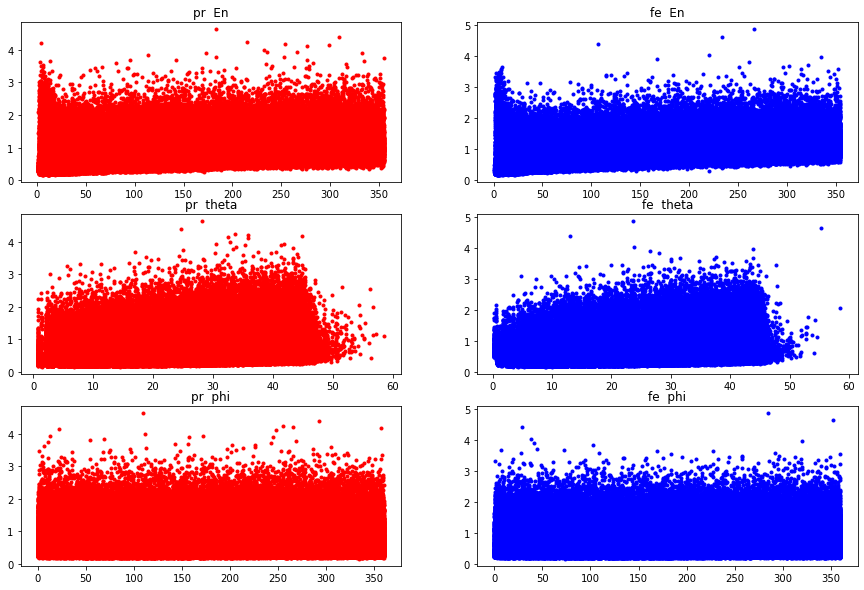

In [41]:
analys_by_pat(loss)

In [45]:
import torch
fe_lat = latent_list[torch.where(params[:,1]>1000)]
pr_lat = latent_list[torch.where(params[:,1]<1000)]

In [24]:
print('fe', fe_lat.mean(), fe_lat.std())
print('pr', pr_lat.mean(), pr_lat.std())

fe tensor(0.9387) tensor(7.3101)
pr tensor(0.8348) tensor(6.6387)


In [30]:
for i in range(16):
    print(f'fe ch{i} mean', round(fe_lat[:,i].mean().item(),3),'std', round(fe_lat[:,i].std().item(),3))
    print(f'pr ch{i} mean', round(pr_lat[:,i].mean().item(),3),'std', round(pr_lat[:,i].std().item(),3), '\n')

fe ch0 mean 6.395 std 5.055
pr ch0 mean 5.75 std 4.47 

fe ch1 mean 6.023 std 3.139
pr ch1 mean 5.601 std 2.886 

fe ch2 mean 2.878 std 3.695
pr ch2 mean 2.517 std 3.499 

fe ch3 mean 8.874 std 5.427
pr ch3 mean 8.187 std 4.78 

fe ch4 mean -1.059 std 3.999
pr ch4 mean -1.163 std 3.79 

fe ch5 mean -2.031 std 3.939
pr ch5 mean -1.837 std 3.616 

fe ch6 mean 3.673 std 4.489
pr ch6 mean 3.147 std 4.004 

fe ch7 mean -1.272 std 3.315
pr ch7 mean -1.255 std 3.021 

fe ch8 mean -0.183 std 2.371
pr ch8 mean 0.055 std 2.161 

fe ch9 mean -0.975 std 3.142
pr ch9 mean -0.78 std 2.925 

fe ch10 mean 8.705 std 5.959
pr ch10 mean 8.051 std 5.123 

fe ch11 mean -10.094 std 7.754
pr ch11 mean -9.327 std 6.81 

fe ch12 mean -0.913 std 1.603
pr ch12 mean -0.906 std 1.516 

fe ch13 mean -10.639 std 7.942
pr ch13 mean -9.745 std 6.966 

fe ch14 mean -0.767 std 3.526
pr ch14 mean -0.736 std 3.254 

fe ch15 mean 6.405 std 4.462
pr ch15 mean 5.796 std 4.088 



In [44]:
import sklearn

In [46]:
from sklearn.utils import shuffle
data = torch.concat((fe_lat, pr_lat), dim=0)
lable = torch.concat((torch.ones(len(fe_lat)), torch.zeros(len(pr_lat))), dim=0)
data, lable = shuffle(data, lable, random_state=0)

In [48]:
n=900000
X_tr, X_test = data[:n], data[n:]
y_tr, y_test = lable[:n], lable[n:]

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_tr, y_tr)

In [52]:
clf.score(X_test, y_test)

0.5224903966625821

# Fe-pr - 512

In [5]:
# Fe-pr
exp = 'Fe_Pr26.01.2025_02:34latent_dim=64;_hidden_dim=512;_'
config = 'config.yaml'
model = pipline.Pipline(config)
chpt = f'/home/rfit/Telescope_Array/phd_work/Models_VAE/{exp}/best'
model.load_chpt(chpt)

keys ['norm_param', 'test', 'train', 'val']
keys ['norm_param', 'test', 'train', 'val']
Encoder has params: 1196160 Decoder has params: 2208263


In [6]:
latent_list, params, loss = model.predict_latent()

Saving Path: ../../Models_VAE/Pr_photon28.01.2025_17:46latent_dim=64;_hidden_dim=512;_
keys ['norm_param', 'test', 'train', 'val']


  0%|          | 0/577 [00:00<?, ?it/s]

keys ['norm_param', 'test', 'train', 'val']
Encoder has params: 1196160 Decoder has params: 2208263
keys ['norm_param', 'test', 'train', 'val']


100%|██████████| 577/577 [01:21<00:00,  7.11it/s]


torch.Size([864409, 10])


In [14]:
def analys_by_pat(array):
    fe = array[torch.where(params[:,1]<10)]
    pr = array[torch.where(params[:,1]>10)]
    print('photon', 'mean', fe.mean(), 'std', fe.std())
    print('pr', 'mean', pr.mean(), 'std', pr.std(), '\n')
    fig, axs = plt.subplots(3,2, figsize = (15,10))
    names = ['En', 'theta', 'phi'] 
    for i in range(3):
        fe_en = params[:,3+i][torch.where(params[:,1]<10)]
        pr_en = params[:,3+i][torch.where(params[:,1]>10)]
        axs[i][0].plot(pr_en,pr,'.r')
        axs[i][1].plot(fe_en,fe,'.b')

    #     axs[0].hist(pr, density = False)
    #     axs[1].hist(fe, density = False)

        axs[i][0].set_title('pr  '+names[i])
        axs[i][1].set_title('photon  '+names[i])

photon mean tensor(0.7236) std tensor(0.4162)
pr mean tensor(0.7175) std tensor(0.3885) 



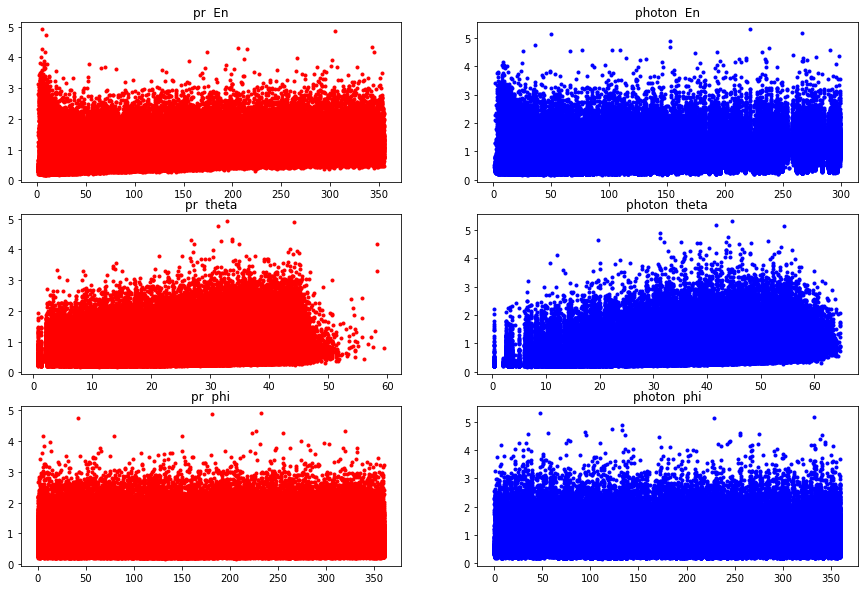

In [15]:
analys_by_pat(loss)

In [12]:
params[:,1]

tensor([ 1., 14., 14.,  ..., 14.,  1., 14.], dtype=torch.float64)

In [17]:
import torch
fe_lat = latent_list[torch.where(params[:,1]>10)]
pr_lat = latent_list[torch.where(params[:,1]<10)]
print('pr', fe_lat.mean(), fe_lat.std())
print('photon', pr_lat.mean(), pr_lat.std())
for i in range(latent_list.shape[-1]):
    print(f'pr ch{i} mean', round(fe_lat[:,i].mean().item(),3),'std', round(fe_lat[:,i].std().item(),3))
    print(f'photon ch{i} mean', round(pr_lat[:,i].mean().item(),3),'std', round(pr_lat[:,i].std().item(),3), '\n')

pr tensor(-0.0514) tensor(0.2811)
photon tensor(-0.0514) tensor(0.2816)
pr ch0 mean -0.296 std 0.006
photon ch0 mean -0.298 std 0.001 

pr ch1 mean 0.143 std 0.006
photon ch1 mean 0.143 std 0.001 

pr ch2 mean -0.083 std 0.006
photon ch2 mean -0.082 std 0.001 

pr ch3 mean 0.325 std 0.008
photon ch3 mean 0.324 std 0.001 

pr ch4 mean -0.589 std 0.016
photon ch4 mean -0.59 std 0.001 

pr ch5 mean -0.222 std 0.003
photon ch5 mean -0.223 std 0.001 

pr ch6 mean -0.344 std 0.01
photon ch6 mean -0.346 std 0.001 

pr ch7 mean 0.328 std 0.007
photon ch7 mean 0.328 std 0.001 

pr ch8 mean -0.339 std 0.01
photon ch8 mean -0.339 std 0.001 

pr ch9 mean -0.101 std 0.005
photon ch9 mean -0.1 std 0.0 

pr ch10 mean -0.002 std 0.01
photon ch10 mean -0.0 std 0.001 

pr ch11 mean 0.339 std 0.007
photon ch11 mean 0.34 std 0.001 

pr ch12 mean -0.302 std 0.005
photon ch12 mean -0.301 std 0.001 

pr ch13 mean -0.124 std 0.004
photon ch13 mean -0.123 std 0.001 

pr ch14 mean 0.351 std 0.01
photon ch14 mea

In [21]:
import sklearn
from sklearn.utils import shuffle
data = torch.concat((fe_lat, pr_lat), dim=0)
lable = torch.concat((torch.ones(len(fe_lat)), torch.zeros(len(pr_lat))), dim=0)
data, lable = shuffle(data, lable, random_state=0)
n=900000
X_tr, X_test = data[:n], data[n:]
y_tr, y_test = lable[:n], lable[n:]
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_tr, y_tr)
clf.score(X_test, y_test)

ValueError: Found array with 0 sample(s) (shape=(0, 64)) while a minimum of 1 is required.

In [22]:
# pr-photon

In [24]:
# Fe-pr
exp = 'Pr_photon27.01.2025_00:10latent_dim=16;_hidden_dim=512;_'
config = 'config.yaml'
model = pipline.Pipline(config)
chpt = f'/home/rfit/Telescope_Array/phd_work/Models_VAE/{exp}/best'
model.load_chpt(chpt)

keys ['norm_param', 'test', 'train', 'val']
keys ['norm_param', 'test', 'train', 'val']
Encoder has params: 1097760 Decoder has params: 2134535


In [25]:
latent_list, params, loss = model.predict_latent()

Saving Path: ../../Models_VAE/Pr_photon30.01.2025_14:48latent_dim=16;_hidden_dim=512;_
keys ['norm_param', 'test', 'train', 'val']
keys ['norm_param', 'test', 'train', 'val']
Encoder has params: 1097760 Decoder has params: 2134535
keys ['norm_param', 'test', 'train', 'val']


100%|██████████| 577/577 [01:22<00:00,  6.97it/s]


torch.Size([864409, 10])


In [26]:
import torch
fe_lat = latent_list[torch.where(params[:,1]>10)]
pr_lat = latent_list[torch.where(params[:,1]<10)]
print('pr', fe_lat.mean(), fe_lat.std())
print('photon', pr_lat.mean(), pr_lat.std())
for i in range(latent_list.shape[-1]):
    print(f'pr ch{i} mean', round(fe_lat[:,i].mean().item(),3),'std', round(fe_lat[:,i].std().item(),3))
    print(f'photon ch{i} mean', round(pr_lat[:,i].mean().item(),3),'std', round(pr_lat[:,i].std().item(),3), '\n')

pr tensor(-0.0748) tensor(0.2441)
photon tensor(-0.0753) tensor(0.2447)
pr ch0 mean -0.066 std 0.003
photon ch0 mean -0.066 std 0.0 

pr ch1 mean 0.093 std 0.003
photon ch1 mean 0.092 std 0.0 

pr ch2 mean -0.045 std 0.004
photon ch2 mean -0.046 std 0.001 

pr ch3 mean 0.027 std 0.003
photon ch3 mean 0.026 std 0.001 

pr ch4 mean -0.17 std 0.006
photon ch4 mean -0.168 std 0.001 

pr ch5 mean 0.156 std 0.009
photon ch5 mean 0.158 std 0.002 

pr ch6 mean -0.099 std 0.007
photon ch6 mean -0.102 std 0.002 

pr ch7 mean 0.036 std 0.007
photon ch7 mean 0.034 std 0.001 

pr ch8 mean 0.585 std 0.021
photon ch8 mean 0.587 std 0.002 

pr ch9 mean -0.14 std 0.015
photon ch9 mean -0.144 std 0.002 

pr ch10 mean -0.38 std 0.01
photon ch10 mean -0.38 std 0.001 

pr ch11 mean -0.439 std 0.012
photon ch11 mean -0.441 std 0.001 

pr ch12 mean -0.475 std 0.011
photon ch12 mean -0.476 std 0.001 

pr ch13 mean -0.16 std 0.003
photon ch13 mean -0.16 std 0.001 

pr ch14 mean -0.101 std 0.005
photon ch14 mea

In [31]:
import sklearn
from sklearn.utils import shuffle
data = torch.concat((fe_lat, pr_lat), dim=0)
lable = torch.concat((torch.ones(len(fe_lat)), torch.zeros(len(pr_lat))), dim=0)
data, lable = shuffle(data, lable, random_state=0)
n=800000
X_tr, X_test = data[:n], data[n:]
y_tr, y_test = lable[:n], lable[n:]
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=3, random_state=0).fit(X_tr, y_tr)
clf.score(X_test, y_test)

0.5970283656010806

In [30]:
X_tr.shape

torch.Size([864409, 16])

In [ ]:
# протон- железо (размер при котор)